In [1]:
%load_ext autoreload
%autoreload 2

# preprocessing


In [3]:
# %load pipeline.py
import numpy as np
import cv2
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
from pipeline import *

In [83]:
from lib.utils import *

In [5]:
detect_model, recog_model = load_model()

In [6]:
del recog_model

In [7]:
torch.cuda.empty_cache()

In [9]:
image = cv2.imread('img.png',cv2.IMREAD_GRAYSCALE)
image1 = cv2.imread('bias1.png',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('bias2.png',cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('bias3.png',cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('bias4.png', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('bias1.png', cv2.IMREAD_GRAYSCALE)
# results = detect_model(image)

In [10]:
images = [image, image1, image2, image3, image4]

In [11]:
pages, results = layout_analysis(detect_model, images)


0: 640x480 2 Headers, 5 Texts, 3 Titles, 1: 640x480 2 Headers, 2 Texts, 2: 640x480 2 Headers, 4 Texts, 3: 640x480 2 Headers, 3 Texts, 4: 640x480 2 Headers, 3 Texts, 58.6ms
Speed: 2.4ms preprocess, 11.7ms inference, 41.9ms postprocess per image at shape (1, 3, 640, 480)


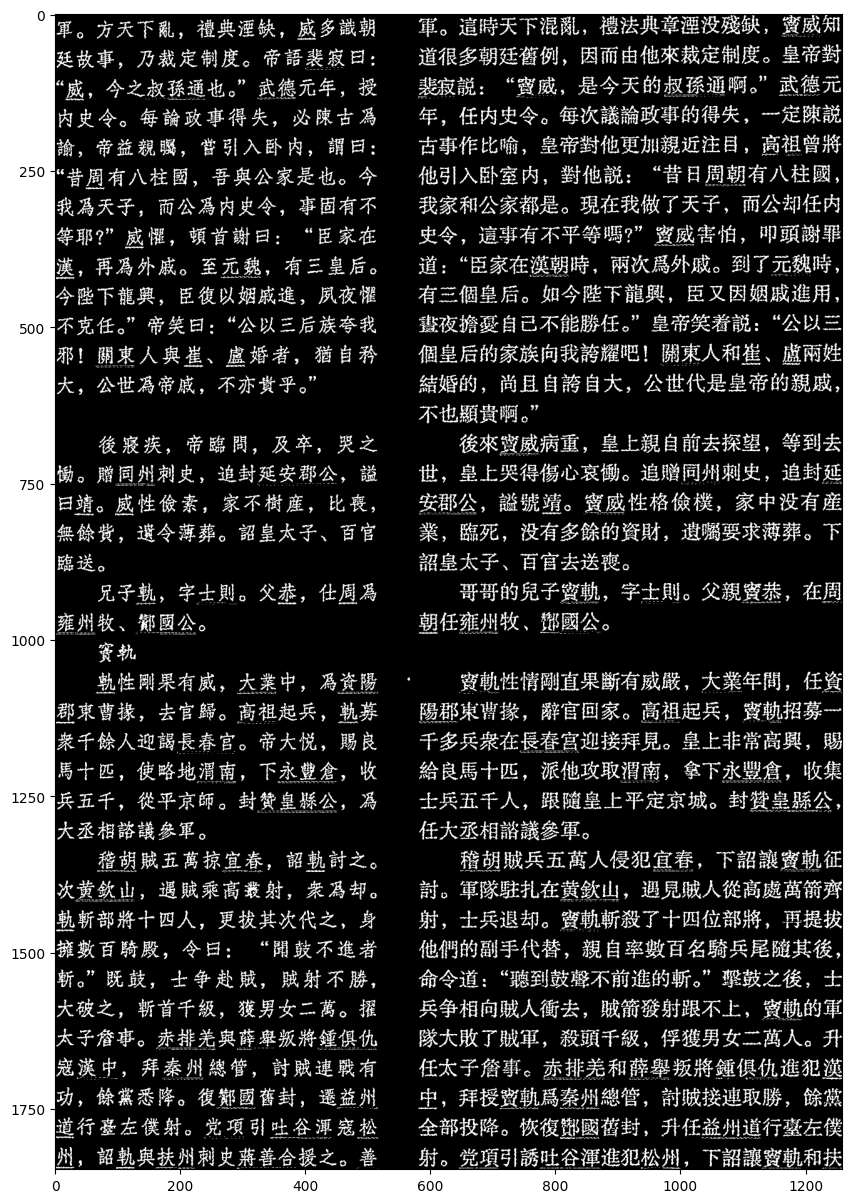

In [12]:
view(pages[-1].text)

In [14]:
pages[-1].process()

In [18]:
_ = pages[-1].line_type

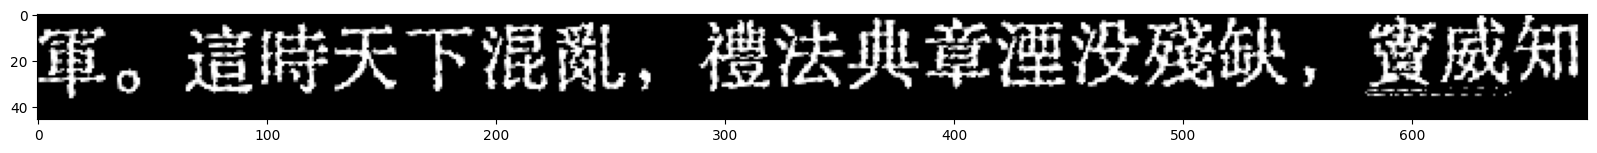

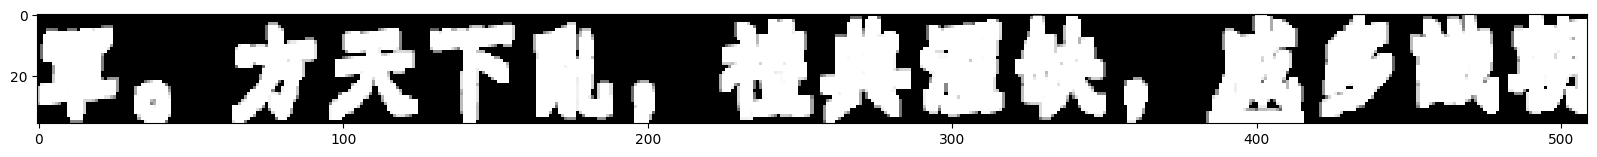

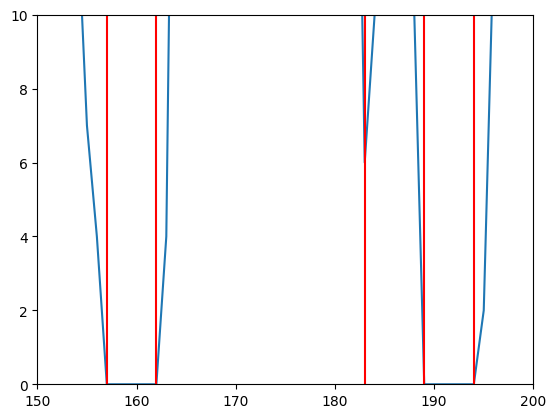

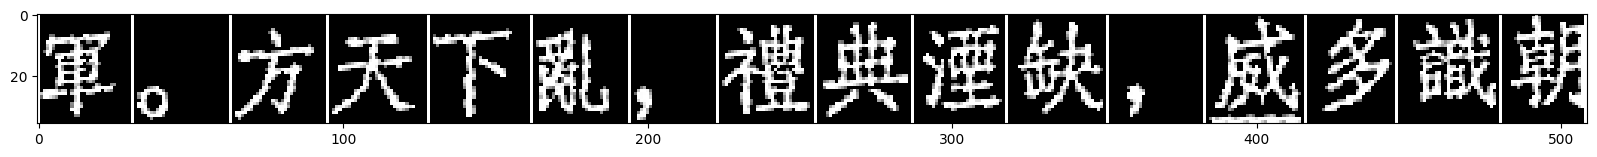

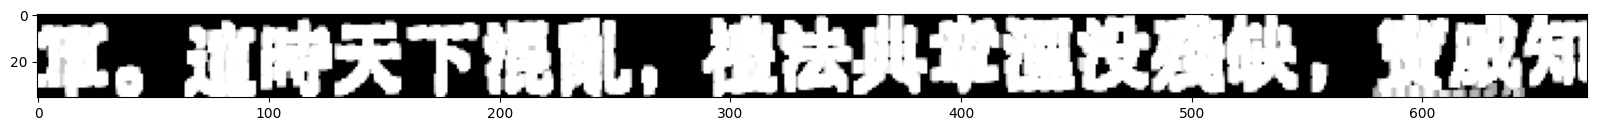

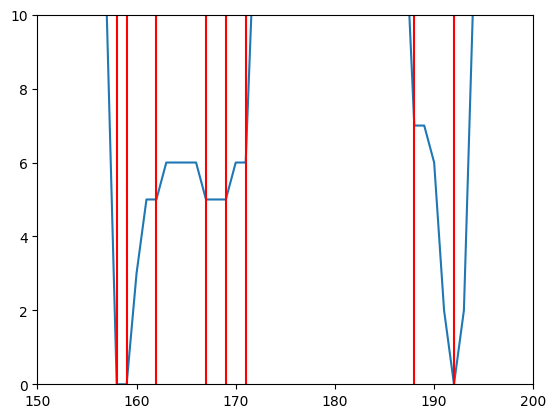

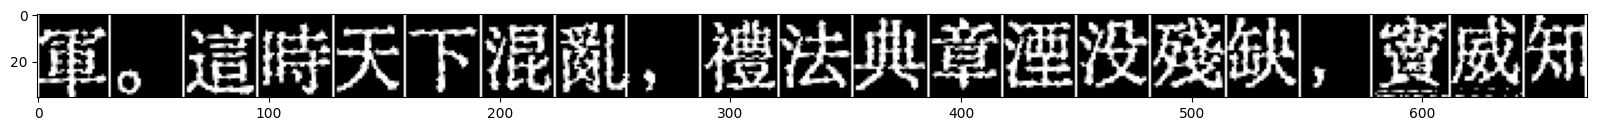

In [73]:
left_chars, right_chars, left_line, right_line = pages[-1].prepare_data()

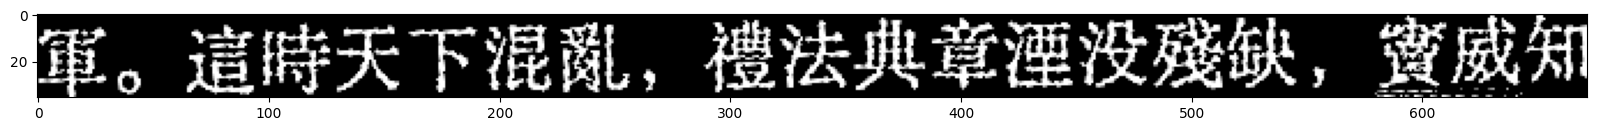

In [20]:
view(right_line)

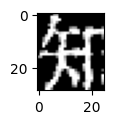

In [95]:
view(char, (1,1))

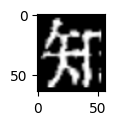

In [96]:
view(resize_char(char), (1,1))

In [106]:
1 + False

1

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


/home/mao/workspace/24histories/lib/utils.py:238: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  padded_image[y:y+new_height, x:x+new_width] = resized_image


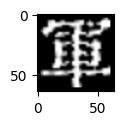

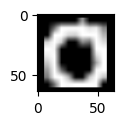

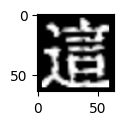

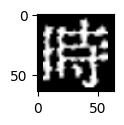

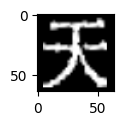

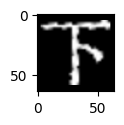

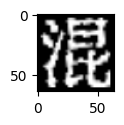

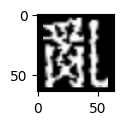

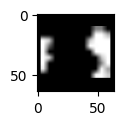

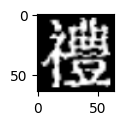

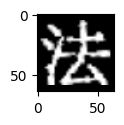

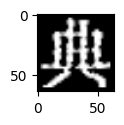

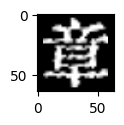

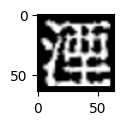

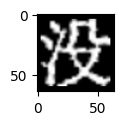

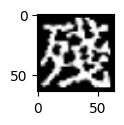

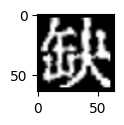

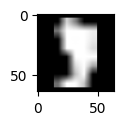

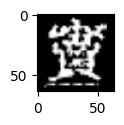

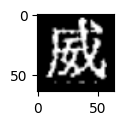

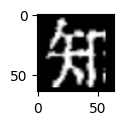

In [108]:
for char in right_chars:
    resized_char = resize_char(char)
    view(resized_char, (1,1))
    print(resized_char.shape)

In [109]:
right_chars_resize = [resize_char(char) for char in right_chars]
input = torch.from_numpy(np.array(right_chars_resize)[:,None,:,:]) / 255 # normalize to [0,1]

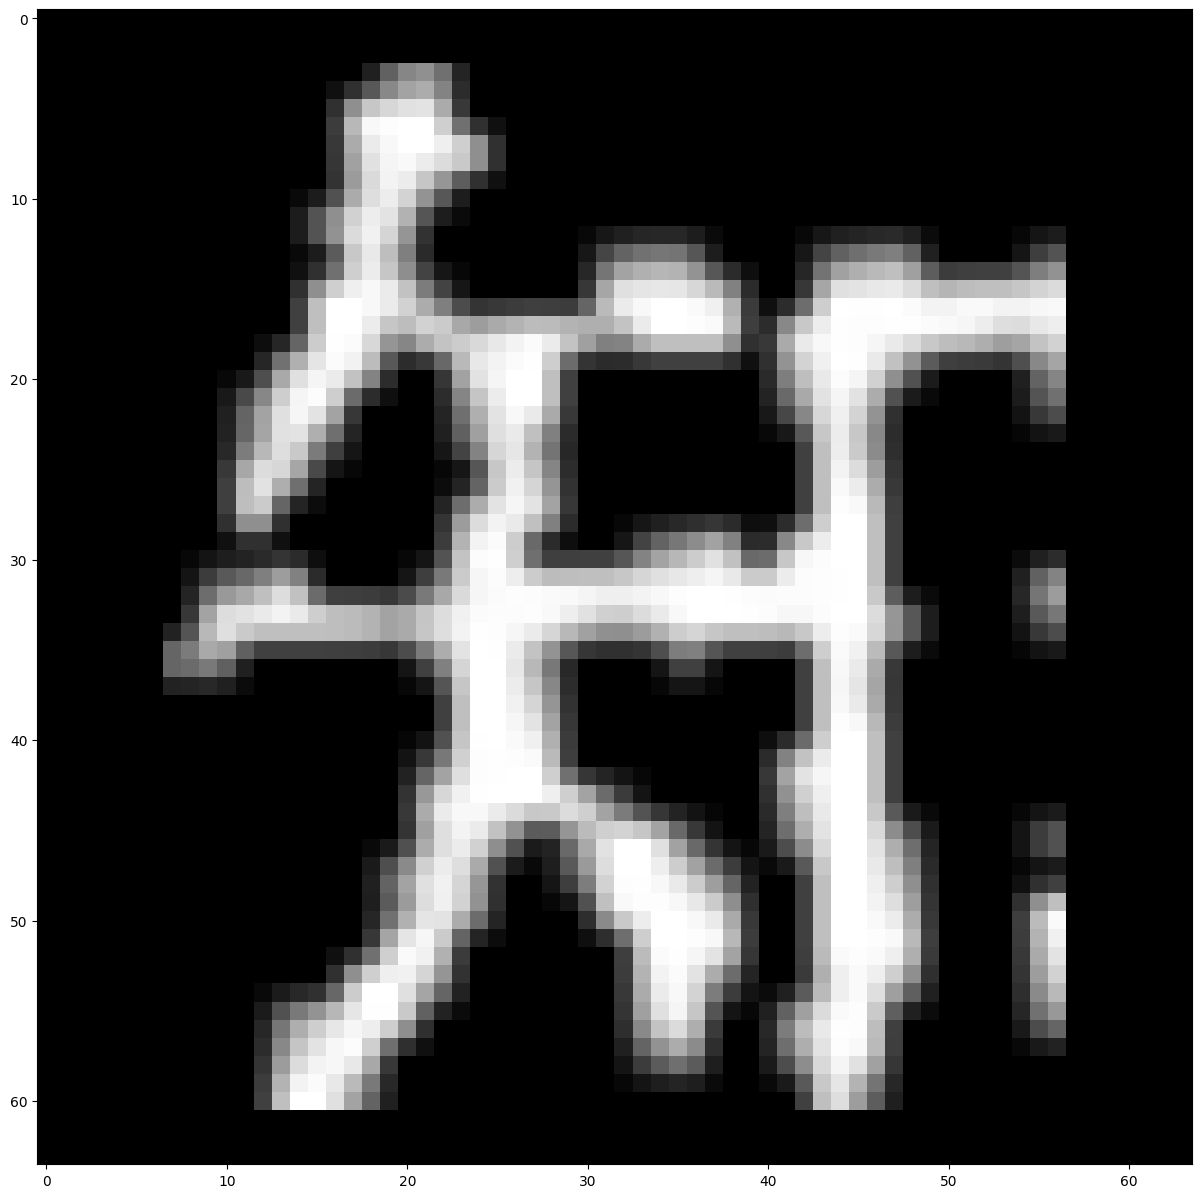

In [110]:
view(input[-1].cpu().numpy()[0])

In [111]:
logprobs = recog_model(input.to(device))
labels = logprobs.argmax(axis=1).tolist()

In [113]:
_, labels_candidates = torch.topk(logprobs, 5, dim=-1)

In [117]:
labels_candidates.T.tolist()

[[2341,
  10,
  2527,
  6856,
  6334,
  4672,
  9572,
  7507,
  10,
  11406,
  9385,
  5209,
  11579,
  9647,
  9349,
  349,
  7435,
  8,
  7660,
  349,
  11144],
 [10133,
  14,
  7317,
  6853,
  7094,
  7094,
  9343,
  7655,
  6,
  4033,
  9454,
  6339,
  7516,
  9422,
  2422,
  2461,
  5616,
  1,
  2603,
  953,
  5580],
 [5233,
  8,
  9603,
  5753,
  6338,
  5474,
  9406,
  8517,
  4,
  9846,
  11356,
  10027,
  2049,
  9671,
  9301,
  11668,
  11917,
  14,
  9909,
  470,
  11146],
 [6683,
  1188,
  1826,
  8361,
  10282,
  5472,
  7937,
  11078,
  3,
  2134,
  9365,
  6079,
  2026,
  9516,
  11345,
  4915,
  11940,
  4720,
  10850,
  10925,
  11442],
 [5767,
  4686,
  6664,
  2204,
  7187,
  4665,
  9472,
  10720,
  1,
  11402,
  7811,
  6227,
  2917,
  2602,
  9428,
  7700,
  12196,
  9078,
  9922,
  2457,
  10229]]

In [118]:
def show_labels(labels):
    return ''.join([label2char[label] for label in labels])

In [120]:
for labels in labels_candidates.T.tolist():
    print(show_labels(labels))

軍”這峷天下混愀”禮法典章湮没舑悐’懣舑知
熲】忘峳干干沘懝；魈洼央意洒轂辨呦，邃藜吞
冣’渲啈夭卞泯朘！澧祛烘賁溧汝筴紛】瀅苖矩
寅蜪諠昔犬卜掍瞅？趙沽坱貣涯祋俄紻亅瘛皏秬
啚丩宣跱开丁浦畔，禨抾塠鉸邂洝戒缺櫝瀗辟牟


In [66]:
import pickle
with open('./data/dicts/labels.pkl', 'rb') as f:
    label2char = pickle.load(f)

In [35]:
from lib.dataset import CharDataset

datamodule = CharDataset(data_dir='./data', train_batch_size=128)

In [39]:
datamodule.setup('fit')

In [41]:
for batch in datamodule.train_dataloader():
    print(batch[0][0])
    break

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [49]:
batch[0].shape

torch.Size([128, 1, 64, 64])

In [42]:
torch.unique(batch[0][0])

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314, 0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373, 0.1412, 0.1451, 0.1490,
        0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725, 0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078, 0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431, 0.2471, 0.2549, 0.2588, 0.2627, 0.2706, 0.2784, 0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3059, 0.3137, 0.3176, 0.3216,
        0.3294, 0.3412, 0.3451, 0.3490, 0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3843, 0.3882, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4235, 0.4275, 0.4314, 0.4353, 0.4392, 0.4431, 0.4510, 0.4588, 0.4627, 0.4667, 0.4784, 0.4902, 0.4941, 0.4980, 0.5059, 0.5098, 0.5176, 0.5294, 0.5333, 0.5647, 0.5765,
        0.5961, 0.6118, 0.6275, 0.6392, 